# Tahap 1: Exploratory Data Analysis (EDA)
## Credit Card Fraud Detection Dataset

**Objektif**: Memahami karakteristik dataset, mengidentifikasi class imbalance, dan mempersiapkan data untuk preprocessing.

**Dataset**: Credit Card Fraud Detection dari Kaggle
- Link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
- Fitur: 30 kolom (Time, V1-V28, Amount, Class)
- Target: Class (0=Normal, 1=Fraud)

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Library berhasil diimport")

✅ Library berhasil diimport


## 1. Load dan Inspeksi Data

In [3]:
# Load dataset
# CATATAN: Download dataset dari Kaggle dan letakkan di folder data/
df = pd.read_csv('../data/creditcard.csv')

print(f"📊 Dataset berhasil dimuat!")
print(f"Shape: {df.shape}")
print(f"Ukuran: {df.shape[0]:,} baris, {df.shape[1]} kolom")

📊 Dataset berhasil dimuat!
Shape: (284807, 31)
Ukuran: 284,807 baris, 31 kolom


In [4]:
# Inspeksi struktur data
print("=== INFO DATASET ===")
print(df.info())
print("\n=== SAMPLE DATA ===")
df.head()

=== INFO DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  fl

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Statistik deskriptif
print("=== STATISTIK DESKRIPTIF ===")
df.describe()

=== STATISTIK DESKRIPTIF ===


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Cek missing values
print("=== MISSING VALUES ===")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("✅ Tidak ada missing values dalam dataset")
else:
    print(f"⚠️ Total missing values: {missing_values.sum()}")

=== MISSING VALUES ===
Series([], dtype: int64)
✅ Tidak ada missing values dalam dataset


## 2. Analisis Class Imbalance

**Mengapa ini penting?**
- Fraud detection adalah masalah klasifikasi yang sangat tidak seimbang
- Transaksi normal jauh lebih banyak daripada transaksi penipuan
- Model cenderung bias terhadap kelas mayoritas (normal)
- Akurasi bukan metrik yang tepat untuk kasus ini

In [7]:
# Analisis distribusi kelas
class_counts = df['Class'].value_counts()
class_percentages = df['Class'].value_counts(normalize=True) * 100

print("=== DISTRIBUSI KELAS ===")
print(f"Normal (0): {class_counts[0]:,} transaksi ({class_percentages[0]:.2f}%)")
print(f"Fraud (1): {class_counts[1]:,} transaksi ({class_percentages[1]:.2f}%)")
print(f"\nRasio Imbalance: 1:{class_counts[0]/class_counts[1]:.0f}")
print(f"Artinya: Setiap 1 transaksi fraud, ada {class_counts[0]/class_counts[1]:.0f} transaksi normal")

=== DISTRIBUSI KELAS ===
Normal (0): 284,315 transaksi (99.83%)
Fraud (1): 492 transaksi (0.17%)

Rasio Imbalance: 1:578
Artinya: Setiap 1 transaksi fraud, ada 578 transaksi normal


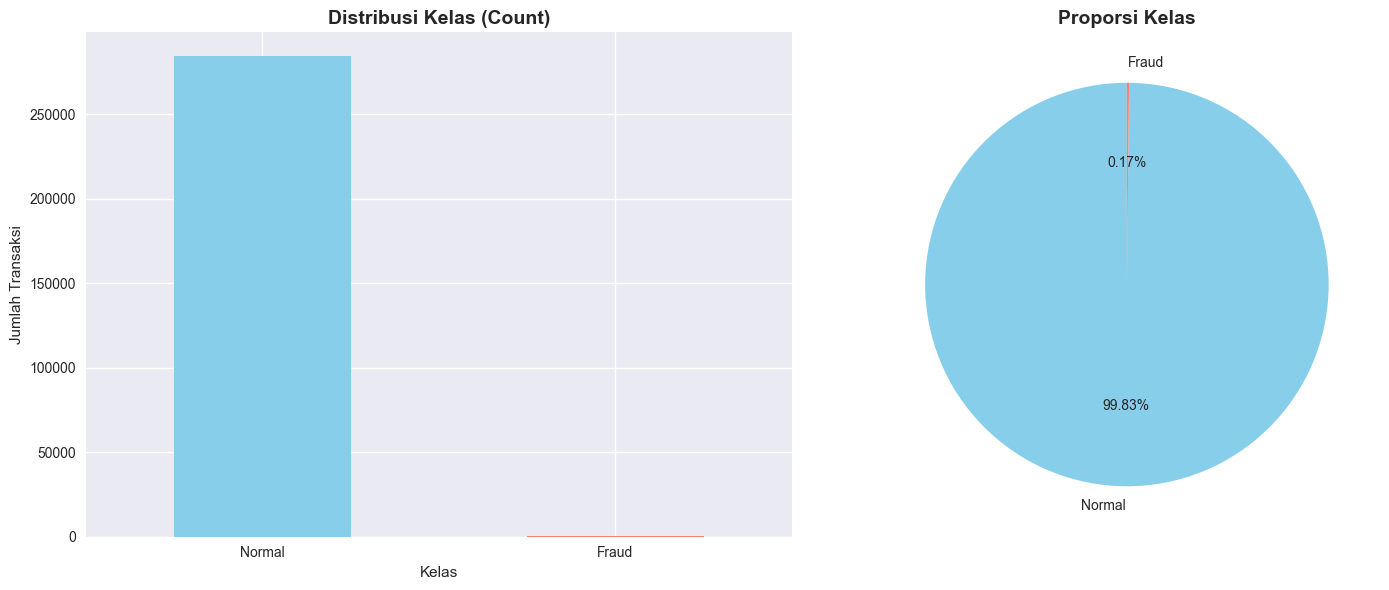


🔍 INSIGHT:
- Dataset sangat tidak seimbang (highly imbalanced)
- Fraud hanya 0.17% dari total transaksi
- Diperlukan teknik khusus untuk menangani imbalance ini


In [8]:
# Visualisasi class imbalance
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot
class_counts.plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('Distribusi Kelas (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Kelas')
axes[0].set_ylabel('Jumlah Transaksi')
axes[0].set_xticklabels(['Normal', 'Fraud'], rotation=0)

# Pie chart
axes[1].pie(class_counts.values, labels=['Normal', 'Fraud'], autopct='%1.2f%%', 
           colors=['skyblue', 'salmon'], startangle=90)
axes[1].set_title('Proporsi Kelas', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🔍 INSIGHT:")
print("- Dataset sangat tidak seimbang (highly imbalanced)")
print("- Fraud hanya 0.17% dari total transaksi")
print("- Diperlukan teknik khusus untuk menangani imbalance ini")

## 3. Analisis Fitur Time dan Amount

=== ANALISIS FITUR TIME ===
Min: 0 detik
Max: 172792 detik
Range: 48.0 jam
Mean: 94814 detik


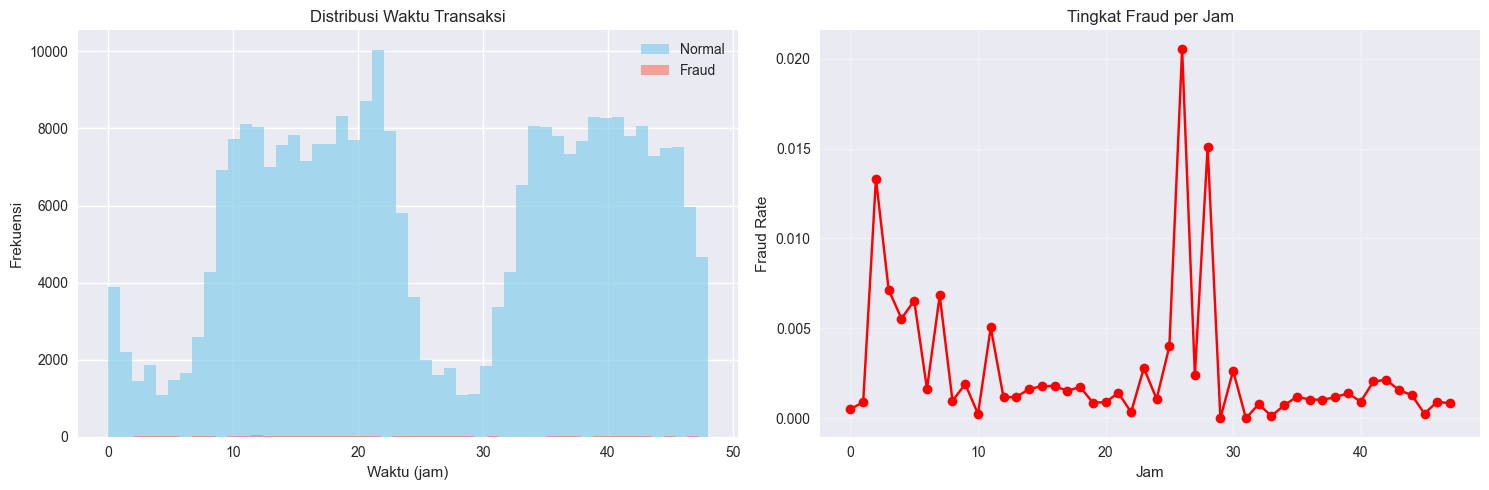

In [9]:
# Analisis fitur Time
print("=== ANALISIS FITUR TIME ===")
print(f"Min: {df['Time'].min():.0f} detik")
print(f"Max: {df['Time'].max():.0f} detik")
print(f"Range: {(df['Time'].max() - df['Time'].min())/3600:.1f} jam")
print(f"Mean: {df['Time'].mean():.0f} detik")

# Konversi ke jam untuk analisis
df['Time_hours'] = df['Time'] / 3600

# Visualisasi distribusi waktu untuk fraud vs normal
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(df[df['Class']==0]['Time_hours'], bins=50, alpha=0.7, label='Normal', color='skyblue')
plt.hist(df[df['Class']==1]['Time_hours'], bins=50, alpha=0.7, label='Fraud', color='salmon')
plt.xlabel('Waktu (jam)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Waktu Transaksi')
plt.legend()

plt.subplot(1, 2, 2)
fraud_by_hour = df.groupby(df['Time_hours'].astype(int))['Class'].mean()
fraud_by_hour.plot(kind='line', marker='o', color='red')
plt.xlabel('Jam')
plt.ylabel('Fraud Rate')
plt.title('Tingkat Fraud per Jam')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== ANALISIS FITUR AMOUNT ===
Min: $0.00
Max: $25691.16
Mean: $88.35
Median: $22.00

=== PERBANDINGAN AMOUNT ===
Normal - Mean: $88.29, Median: $22.00
Fraud - Mean: $122.21, Median: $9.25


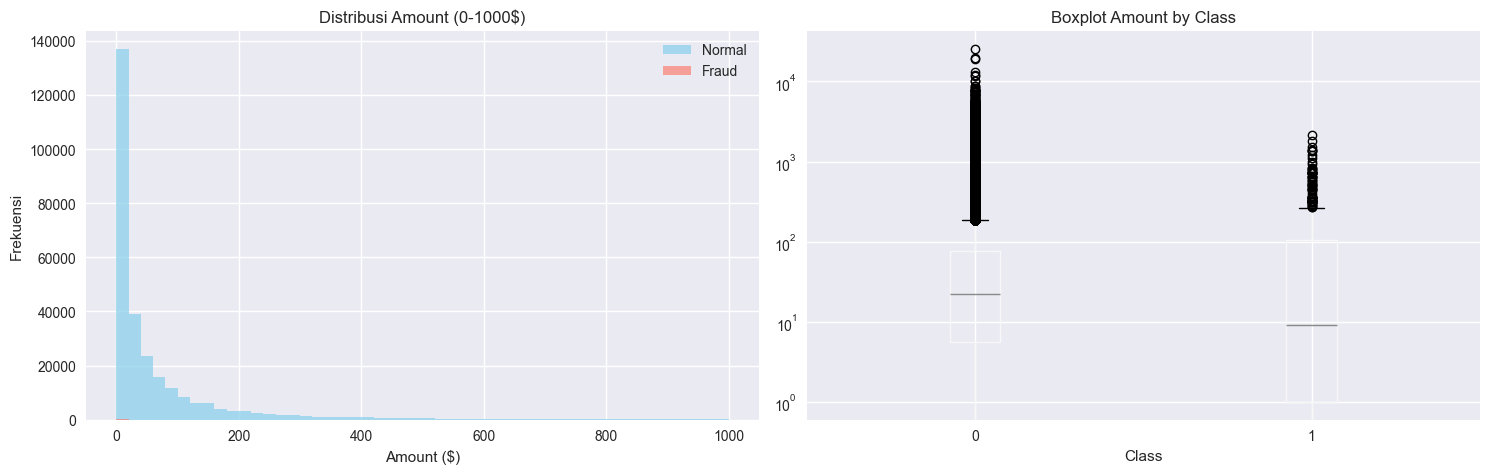

In [10]:
# Analisis fitur Amount
print("=== ANALISIS FITUR AMOUNT ===")
print(f"Min: ${df['Amount'].min():.2f}")
print(f"Max: ${df['Amount'].max():.2f}")
print(f"Mean: ${df['Amount'].mean():.2f}")
print(f"Median: ${df['Amount'].median():.2f}")

# Perbandingan amount untuk fraud vs normal
print("\n=== PERBANDINGAN AMOUNT ===")
normal_amount = df[df['Class']==0]['Amount']
fraud_amount = df[df['Class']==1]['Amount']

print(f"Normal - Mean: ${normal_amount.mean():.2f}, Median: ${normal_amount.median():.2f}")
print(f"Fraud - Mean: ${fraud_amount.mean():.2f}, Median: ${fraud_amount.median():.2f}")

# Visualisasi
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(normal_amount, bins=50, alpha=0.7, label='Normal', color='skyblue', range=(0, 1000))
plt.hist(fraud_amount, bins=50, alpha=0.7, label='Fraud', color='salmon', range=(0, 1000))
plt.xlabel('Amount ($)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Amount (0-1000$)')
plt.legend()

plt.subplot(1, 2, 2)
df.boxplot(column='Amount', by='Class', ax=plt.gca())
plt.title('Boxplot Amount by Class')
plt.suptitle('')  # Remove default title
plt.yscale('log')

plt.tight_layout()
plt.show()

## 4. Analisis Korelasi Fitur

=== TOP 10 FITUR DENGAN KORELASI TERTINGGI TERHADAP CLASS ===
Class    1.000000
V17      0.326481
V14      0.302544
V12      0.260593
V10      0.216883
V16      0.196539
V3       0.192961
V7       0.187257
V11      0.154876
V4       0.133447
V18      0.111485
Name: Class, dtype: float64


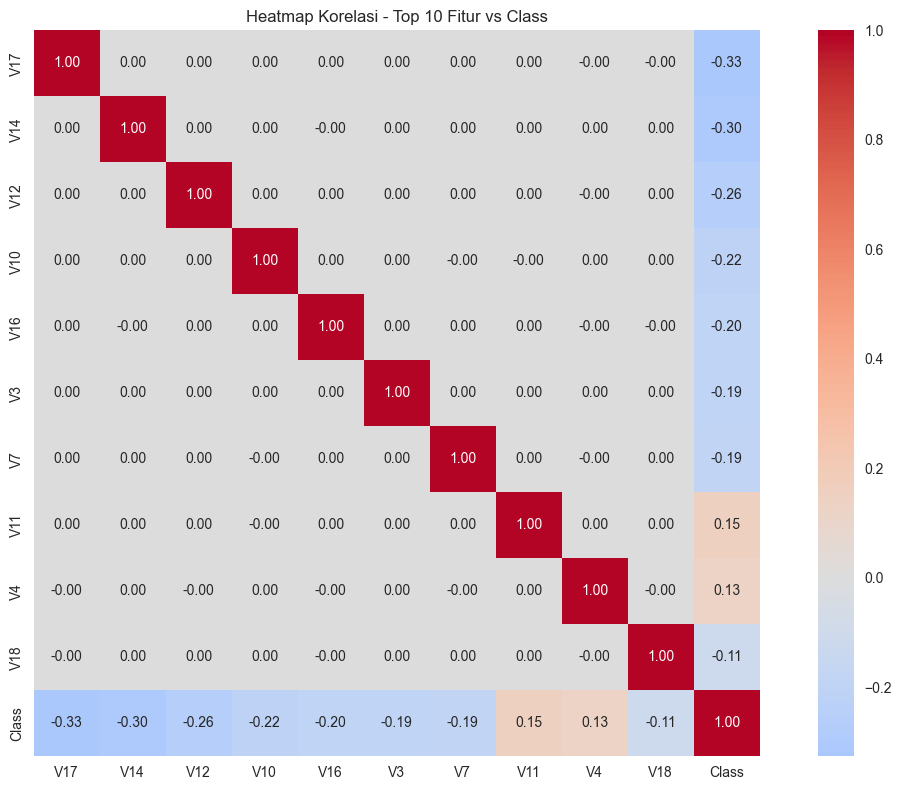

In [11]:
# Korelasi dengan target (Class)
correlations = df.corr()['Class'].abs().sort_values(ascending=False)
print("=== TOP 10 FITUR DENGAN KORELASI TERTINGGI TERHADAP CLASS ===")
print(correlations.head(11))  # 11 karena Class akan selalu 1.0

# Visualisasi korelasi top features
top_features = correlations.head(11).index[1:]  # Exclude 'Class' itself

plt.figure(figsize=(12, 8))
correlation_matrix = df[list(top_features) + ['Class']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Heatmap Korelasi - Top 10 Fitur vs Class')
plt.tight_layout()
plt.show()

## 5. Kesimpulan EDA

### Key Findings:
1. **Class Imbalance Ekstrem**: Hanya 0.17% transaksi yang fraud
2. **Fitur V1-V28**: Sudah di-transform dengan PCA, tidak perlu scaling
3. **Fitur Time & Amount**: Perlu scaling karena range yang berbeda
4. **No Missing Values**: Dataset bersih dan siap diproses

### Next Steps:
1. **Preprocessing**: StandardScaler untuk Time dan Amount
2. **Handle Imbalance**: Gunakan SMOTE untuk oversampling
3. **Model Selection**: Fokus pada Precision, Recall, F1-Score
4. **Evaluation**: Hindari accuracy sebagai metrik utama

In [12]:
# Simpan insights untuk tahap selanjutnya
insights = {
    'total_samples': len(df),
    'fraud_samples': len(df[df['Class']==1]),
    'normal_samples': len(df[df['Class']==0]),
    'fraud_percentage': (len(df[df['Class']==1]) / len(df)) * 100,
    'imbalance_ratio': len(df[df['Class']==0]) / len(df[df['Class']==1]),
    'features_to_scale': ['Time', 'Amount'],
    'pca_features': [f'V{i}' for i in range(1, 29)]
}

print("✅ EDA selesai! Insights disimpan untuk tahap preprocessing.")
print(f"📊 Dataset: {insights['total_samples']:,} samples")
print(f"🔍 Fraud rate: {insights['fraud_percentage']:.3f}%")
print(f"⚖️ Imbalance ratio: 1:{insights['imbalance_ratio']:.0f}")

✅ EDA selesai! Insights disimpan untuk tahap preprocessing.
📊 Dataset: 284,807 samples
🔍 Fraud rate: 0.173%
⚖️ Imbalance ratio: 1:578
